In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
df=pd.read_csv('Social_Network_Ads.csv')

In [47]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [48]:
df=df.iloc[: ,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

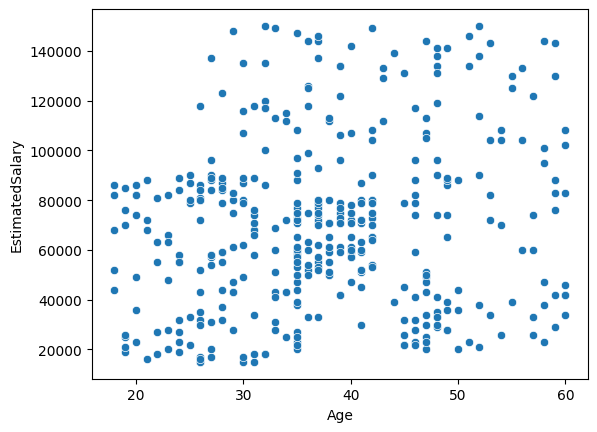

In [49]:
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'])


train test split

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[: ,0:2],df.iloc[: ,-1],test_size=.2)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


# scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.fit_transform(x_test)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

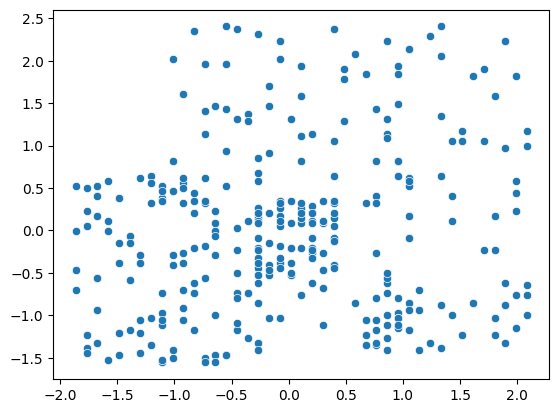

In [53]:
sns.scatterplot(x=x_train_scaled[:,0],y=x_train_scaled[:,1])

# data before and afer scaling

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

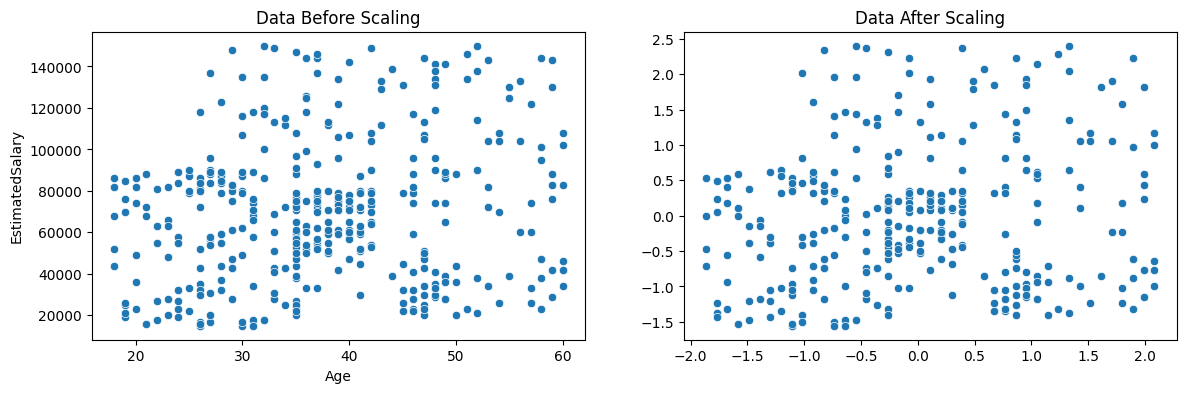

In [54]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'])
plt.title('Data Before Scaling')
plt.subplot(122)
sns.scatterplot(x=x_train_scaled[: ,0],y=x_train_scaled[: ,1])
plt.title('Data After Scaling')
plt.show()

Model without scaling

In [55]:
model1=Sequential()
model1.add(Dense(256,activation='relu',input_dim=2))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33793 (132.00 KB)
Trainable params: 33793 (132.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# model compile 
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
history=model1.fit(x_train,y_train,epochs=500)

Epoch 1/500


10/10 [==============================] - 1s 5ms/step - loss: 1003.5747 - accuracy: 0.4938
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 626.6517 - accuracy: 0.4875
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 322.2991 - accuracy: 0.5125
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 140.0082 - accuracy: 0.5312
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 206.1350 - accuracy: 0.4938
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 309.7184 - accuracy: 0.5562
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 318.5241 - accuracy: 0.4750
Epoch 8/500
10/10 [==============================] - 0s 3ms/step - loss: 258.5533 - accuracy: 0.5312
Epoch 9/500
10/10 [==============================] - 0s 3ms/step - loss: 132.3877 - accuracy: 0.5250
Epoch 10/500
10/10 [==============================] - 0s 3ms/step - loss: 252.3749 - accuracy: 0.5375


model with scaling

In [62]:
model2=Sequential()
model2.add(Dense(256,activation='relu',input_dim=2))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               768       
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33793 (132.00 KB)
Trainable params: 33793 (132.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
history2=model2.fit(x_train_scaled,y_train,epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4427 - accuracy: 0.8344
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.8438
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.8594
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 0.2833 - accuracy: 0.8844
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2584 - accuracy: 0.9000
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9062
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.9125
Epoch 8/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9094
Epoch 9/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.9156
Epoch 10/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9219
Epoch 11/

# accuracy before and after scaling

Text(0.5, 1.0, 'Loss After Scaling')

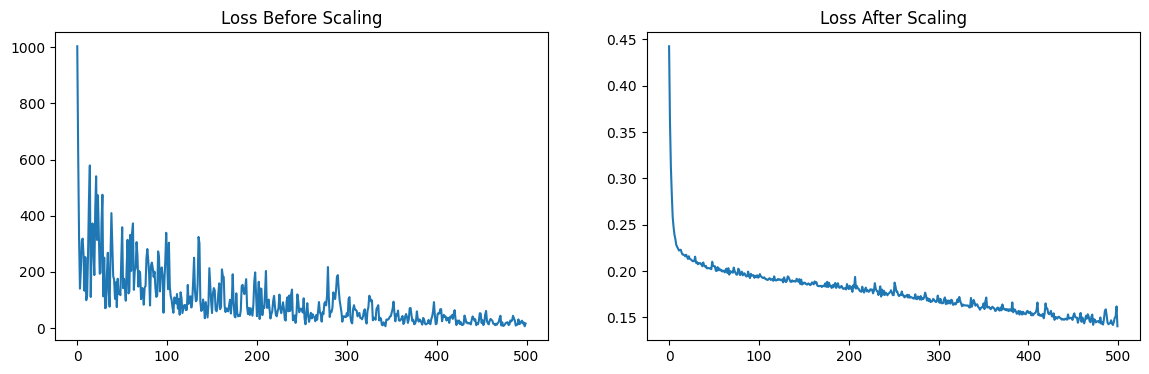

In [72]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(history.history['loss'],label='train')
# plt.plot(history.history['val_loss'],label='test')
plt.title('Loss Before Scaling')
plt.subplot(122)
plt.plot(history2.history['loss'],label='train')
# plt.plot(history2.history['val_loss'],label='test')
plt.title('Loss After Scaling')

Text(0.5, 1.0, 'After Scaling')

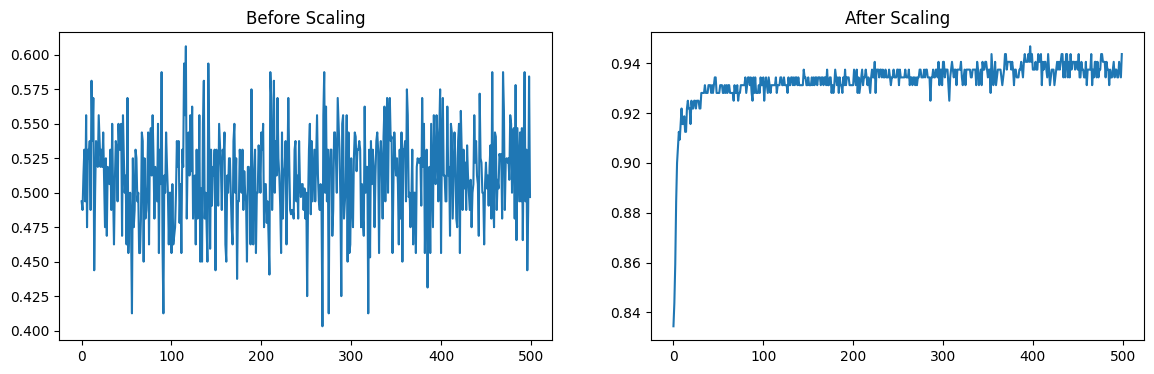

In [73]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(history.history['accuracy'],label='train')
# plt.plot(history.history['val_loss'],label='test')
plt.title('Before Scaling')
plt.subplot(122)
plt.plot(history2.history['accuracy'],label='train')
# plt.plot(history2.history['val_loss'],label='test')
plt.title('After Scaling')